In [21]:
import scri
import sxs
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit



# Download the latest catalog
catalog = sxs.load("catalog",download = False)
# Do some query, this is a pandas dataframe:
ctable = catalog.table
BBHs = ctable[ctable['object_types'] == 'BHBH']
NSBH = ctable[ctable['object_types'] == 'BHNS']
NSNS = ctable[ctable['object_types'] == 'NSNS']

# Low eccentricity, non- precessing

In [22]:
BBHs[(BBHs['reference_eccentricity'] < 1.e-4) & (BBHs['reference_chi1_perp'] < 1.e-8) & (BBHs['reference_chi2_perp'] < 1.e-8)]

,object_types,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,initial_mass1,...,remnant_dimensionless_spin,remnant_dimensionless_spin_mag,remnant_velocity,remnant_velocity_mag,eos,initial_data_type,disk_mass,ejecta_mass,url,metadata_path
SXS:BBH:0012,BHBH,16.000000,0.014491,-0.000048,0.993695,"[-9.7569483e-09, 4.9189483e-09, 5.529549e-10]",1.094074e-08,"[8.006550502e-07, 5.88115691e-08, 0.9205927379...",0.920593,0.600000,...,"[3.17933209092e-08, 9.1501306625e-09, 0.540383...",0.540384,"[0.000765516198877, -0.000166763615435, 8.0898...",7.834699e-04,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1212642,SXS:BBH:0012v5/Lev5/metadata.json
SXS:BBH:0014,BHBH,17.000000,0.013286,-0.000038,0.994029,"[3.1128244e-09, -2.5615531e-09, 5.4325701e-09]",6.764913e-09,"[1.7107772832e-06, 1.5672810511e-06, 0.9451815...",0.945182,0.600000,...,"[-1.38022394836e-09, 1.77730015903e-10, 0.5402...",0.540291,"[-0.000754582623053, -1.04743563801e-06, 2.639...",7.545834e-04,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1212652,SXS:BBH:0014v5/Lev5/metadata.json
SXS:BBH:0019,BHBH,16.000000,0.014447,-0.000035,0.993864,"[-2.5215273e-09, -4.072398e-10, 1.64559223e-08]",1.665297e-08,"[1.1286069479e-06, 3.0832898738e-06, 0.9929355...",0.992936,0.600000,...,"[8.18189877206e-09, 7.36096133903e-08, 0.58675...",0.586755,"[-0.000499686481837, 0.000847003894418, 4.9759...",9.834135e-04,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1212673,SXS:BBH:0019v5/Lev5/metadata.json
SXS:BBH:0031,BHBH,14.000000,0.017339,-0.000040,0.994433,"[3.0246125e-09, -9.827856e-10, 4.6737019e-09]",5.653109e-09,"[6.903254673e-07, 4.31368999e-08, 1.0760479558...",1.076048,0.750000,...,"[-1.72916805313e-08, -8.27039434208e-09, 0.755...",0.755237,"[2.50552081194e-05, -0.000246716341091, -2.683...",2.479853e-04,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1212711,SXS:BBH:0031v5/Lev5/metadata.json
SXS:BBH:0066,BHBH,18.000100,0.012202,-0.000025,0.993735,"[-3.1483019e-09, -3.7937639e-09, 1.4360428e-09]",5.134848e-09,"[5.8994449593e-06, -5.254024735e-07, 1.1846240...",1.184624,0.500000,...,"[-4.94103538319e-10, 1.0269175821e-09, 0.68646...",0.686460,"[2.25213277561e-09, -5.74740218745e-10, 3.7317...",4.396426e-09,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1212944,SXS:BBH:0066v5/Lev5/metadata.json
SXS:BBH:0070,BHBH,18.000000,0.012202,-0.000025,0.993735,"[1.2353239e-09, -4.8770037e-09, 2.5460439e-09]",5.638575e-09,"[2.4781235396e-06, 5.88698574e-08, 1.184611556...",1.184612,0.500000,...,"[-4.2696916721e-10, 1.00184375916e-09, 0.68645...",0.686460,"[1.88811255511e-09, -8.02529007847e-10, 3.6456...",4.183311e-09,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1213244,SXS:BBH:0070v5/Lev5/metadata.json
SXS:BBH:0180,BHBH,18.000000,0.012202,-0.000025,0.993735,"[5e-15, 3.539e-13, -3.778e-13]",5.176901e-13,"[-1.5698901172e-06, -3.87578732e-07, 1.1846106...",1.184611,0.500000,...,"[-2.14539980535e-13, -8.96386037449e-12, 0.686...",0.686430,"[1.16344449238e-09, -1.34056302822e-09, 1.0618...",1.076575e-08,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1214858,SXS:BBH:0180v5/Lev4/metadata.json
SXS:BBH:0270,BHBH,15.800000,0.014752,-0.000046,0.994869,"[-4.7797195e-09, 2.3802125e-09, -2.6947857e-09]",5.981053e-09,"[1.978549686e-07, -3.349952413e-07, 0.66907004...",0.669070,0.750000,...,"[-1.22561441154e-09, -2.44287387692e-10, 0.396...",0.396917,"[-0.000718994630675, 1.62977508914e-05, 7.1970...",7.191793e-04,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1214614,SXS:BBH:0270v5/Lev5/metadata.json
SXS:BBH:0294,BHBH,15.900000,0.014559,-0.000028,0.995186,"[-7.9303272e-09, -1.7404778e-09, -3.3710274e-09]",8.791085e-09,"[1.705514153e-07, -9.046574864e-07, 0.78179439...",0.781794,0.777778,...,"[7.86083438542e-10, -8.05221118883e-10, 0.5041...",0.504184,"[0.000103772544731, -0.000559649923088, 1.0574...",5.691896e-04,NaN,BBH_CF

In [23]:
system='SXS:BBH:2085'

In [24]:
def MT_to_WM(h_mts, dataType=scri.h):
    h = scri.WaveformModes(t=h_mts.t,\
                           data=np.array(h_mts),\
                           ell_min=h_mts.ell_min,\
                           ell_max=h_mts.ell_max,\
                           frameType=scri.Inertial,\
                           dataType=dataType
                           )
    h.r_is_scaled_out = True
    h.m_is_scaled_out = True
    return h

In [25]:
md = sxs.load(system + "/Lev/metadata.json")
waveform = sxs.load(system + "/Lev/rhOverM", extrapolation_order=4)

h = MT_to_WM(waveform)
t = h.t

 # slice from relaxation time to peak time
i_relax = np.abs(t-md.relaxation_time).argmin()
i_peak = h.max_norm_index()
cut = slice(i_relax, i_peak)

E = scri.energy_flux(h)[cut]
L = scri.angular_momentum_flux(h)[cut]
ω = scri.angular_velocity(h)[cut]

F = E - np.einsum('ij,ij->i',ω, L)
ω_mod = np.linalg.norm(ω,axis=1)

Found the following files to load from the SXS catalog:
    SXS:BBH:2085v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2085v4/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


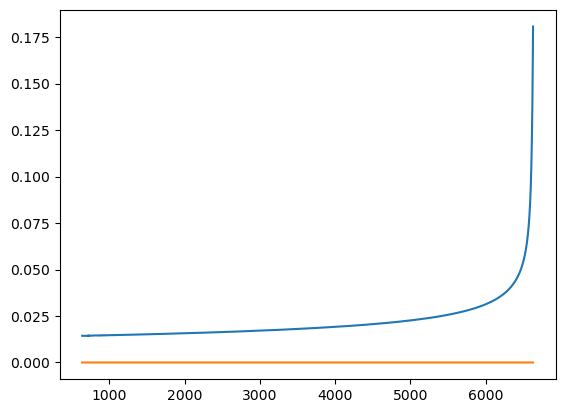

In [26]:
x = t[cut]
y = ω_mod
z = F
plt.plot(x,y)
plt.plot(x,z)

#plt.ylim(-4.3,-4.1)
plt.show()

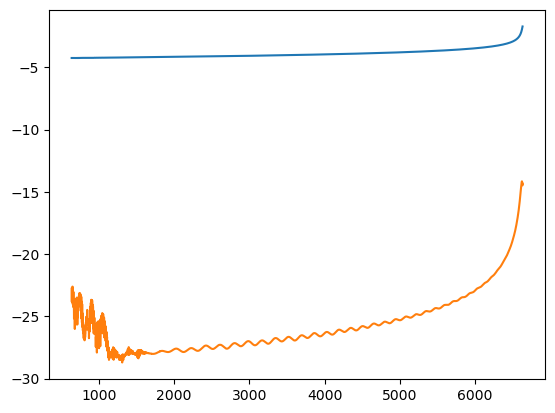

In [27]:
x = t[cut]
y = ω_mod
z = F
plt.plot(x,np.log(y))
plt.plot(x,np.log(z))

#plt.ylim(-4.3,-4.1)
plt.show()

In [39]:
system='SXS:BBH:1533'

In [40]:
md = sxs.load(system + "/Lev/metadata.json")
waveform = sxs.load(system + "/Lev/rhOverM", extrapolation_order=4)

h = MT_to_WM(waveform)
t = h.t

 # slice from relaxation time to peak time
i_relax = np.abs(t-md.relaxation_time).argmin()
i_peak = h.max_norm_index()
cut = slice(i_relax, i_peak)

E = scri.energy_flux(h)[cut]
L = scri.angular_momentum_flux(h)[cut]
ω = scri.angular_velocity(h)[cut]

F = E - np.einsum('ij,ij->i',ω, L)
ω_mod = np.linalg.norm(ω,axis=1)

Found the following files to load from the SXS catalog:
    SXS:BBH:1533v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1533v4/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


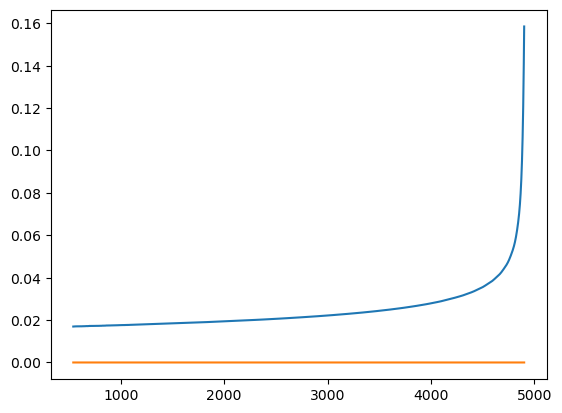

In [41]:
x = t[cut]
y = ω_mod
z = F
plt.plot(x,y)
plt.plot(x,z)

#plt.ylim(-4.3,-4.1)
plt.show()

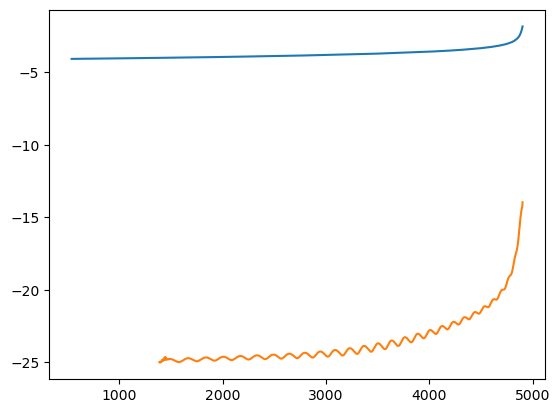

In [43]:
x = t[cut]
y = ω_mod
z = F
plt.plot(x,np.log(y))
plt.plot(x[1000:],np.log(z)[1000:])

#plt.ylim(-4.3,-4.1)
plt.show()

In [32]:
system='SXS:BBH:1367'

In [33]:
md = sxs.load(system + "/Lev/metadata.json")
waveform = sxs.load(system + "/Lev/rhOverM", extrapolation_order=4)

h = MT_to_WM(waveform)
t = h.t

 # slice from relaxation time to peak time
i_relax = np.abs(t-md.relaxation_time).argmin()
i_peak = h.max_norm_index()
cut = slice(i_relax, i_peak)

E = scri.energy_flux(h)[cut]
L = scri.angular_momentum_flux(h)[cut]
ω = scri.angular_velocity(h)[cut]

F = E - np.einsum('ij,ij->i',ω, L)
ω_mod = np.linalg.norm(ω,axis=1)

Found the following files to load from the SXS catalog:
    SXS:BBH:1367v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1367v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


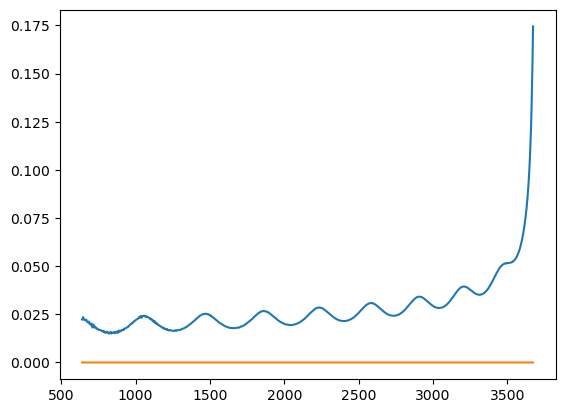

In [34]:
x = t[cut]
y = ω_mod
z = F
plt.plot(x,y)
plt.plot(x,z)
#plt.ylim(-0.00021,0.00021)
plt.show()

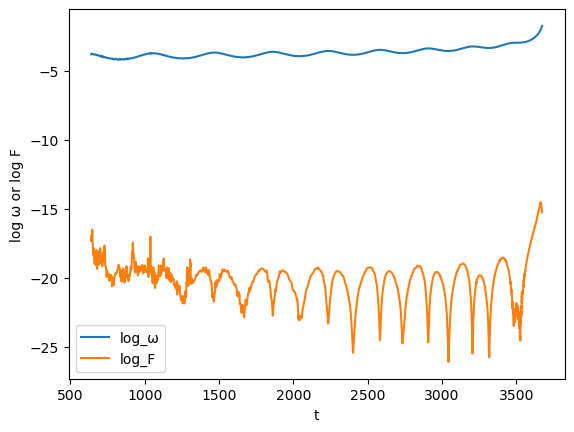

In [37]:
x = t[cut]
y = ω_mod
z = F
plt.plot(x,np.log(y),label='log_ω')
plt.plot(x,np.log(z),label='log_F')
plt.ylabel("log ω or log F" )
plt.xlabel("t")
plt.legend()
#plt.ylim(-4.3,-4.1)
plt.show()